In [350]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re as re
from sklearn.tree import DecisionTreeClassifier
#To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [351]:
# Research Sources include:
# https://www.kaggle.com/zikazika/understandable-titanic-challenge
# https://towardsdatascience.com/your-first-kaggle-competition-submission-64da366e48cb
# https://www.kaggle.com/anaskad/step-by-step-solving-titanic-problem

In [352]:
#import data and assign to DataFrames
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_all = [df_train, df_test]

In [353]:
# Get an over view of the data
#print(df_train.dtypes.reset_index()) # df_train Columns Data
df_train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [354]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [355]:
df_train.isnull().sum(axis = 0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


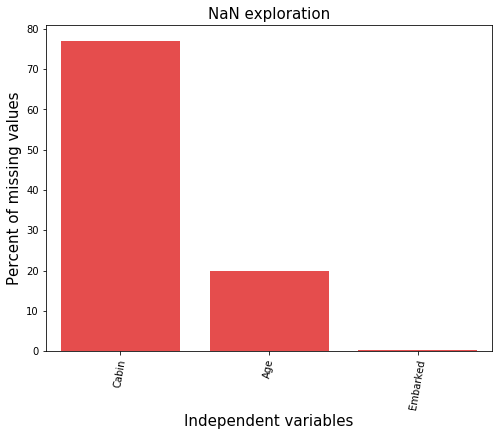

In [356]:
# Mising Data Function
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    f,ax =plt.subplots(figsize=(8,6))
    plt.xticks(rotation='80')
    fig=sns.barplot(ms.index, ms["Percent"],color="red",alpha=0.8)
    plt.xlabel('Independent variables', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('NaN exploration', fontsize=15)
    return ms

missingdata(df_train)

In [357]:
# Pclass 
print(df_train[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [358]:
# Sex
print( df_train[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean() )

      Sex  Survived
0  female  0.742038
1    male  0.188908


In [359]:
# Age 
print( df_train[["Age","Survived"]].groupby(["Age"], as_index = False).mean() )
for data in df_all:
    age_avg  = data['Age'].mean()
    age_std  = data['Age'].std()
    age_null = data['Age'].isnull().sum()

    random_list = np.random.randint(age_avg - age_std, age_avg + age_std , size = age_null)
    data['Age'][np.isnan(data['Age'])] = random_list
    data['Age'] = data['Age'].astype(int)

#df_train['Age_Group'] = pd.cut(df_train['Age'], 6)


      Age  Survived
0    0.42  1.000000
1    0.67  1.000000
2    0.75  1.000000
3    0.83  1.000000
4    0.92  1.000000
5    1.00  0.714286
6    2.00  0.300000
7    3.00  0.833333
8    4.00  0.700000
9    5.00  1.000000
10   6.00  0.666667
11   7.00  0.333333
12   8.00  0.500000
13   9.00  0.250000
14  10.00  0.000000
15  11.00  0.250000
16  12.00  1.000000
17  13.00  1.000000
18  14.00  0.500000
19  14.50  0.000000
20  15.00  0.800000
21  16.00  0.352941
22  17.00  0.461538
23  18.00  0.346154
24  19.00  0.360000
25  20.00  0.200000
26  20.50  0.000000
27  21.00  0.208333
28  22.00  0.407407
29  23.00  0.333333
..    ...       ...
58  44.00  0.333333
59  45.00  0.416667
60  45.50  0.000000
61  46.00  0.000000
62  47.00  0.111111
63  48.00  0.666667
64  49.00  0.666667
65  50.00  0.500000
66  51.00  0.285714
67  52.00  0.500000
68  53.00  1.000000
69  54.00  0.375000
70  55.00  0.500000
71  55.50  0.000000
72  56.00  0.500000
73  57.00  0.000000
74  58.00  0.600000
75  59.00  0.000000


In [360]:
for data in df_all:
    data['Age_Group'] = data['Age']
    data.loc[data['Age_Group'] <= 12, 'Age_Group'] = 0
    data.loc[(data['Age_Group'] > 12) & (data['Age_Group'] <= 40), 'Age_Group'] = 1
    data.loc[(data['Age_Group'] > 40) & (data['Age_Group'] <= 65), 'Age_Group'] = 2
    data.loc[(data['Age_Group'] > 65), 'Age_Group'] = 3

In [361]:
print( df_train[["Age_Group","Survived"]].groupby(["Age_Group"], as_index = False).mean() )

   Age_Group  Survived
0          0  0.579710
1          1  0.373476
2          2  0.354430
3          3  0.125000


In [362]:
# SibSp
print( df_train[["SibSp","Survived"]].groupby(["SibSp"], as_index = False).mean() )

   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


In [363]:
# Parch
print( df_train[["Parch","Survived"]].groupby(["Parch"], as_index = False).mean() )

   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000


In [364]:
# Fare
#print( df_train[["Fare","Survived"]].groupby(["Fare"], as_index = False).mean() )
for data in df_all:
        data['Fare'] = data['Fare'].fillna(data['Fare'].median())
#df_train['Fare_Group'] = pd.qcut(df_train['Fare'], 12)
for data in df_all:
    data['Fare_Group'] = data['Fare']
    data.loc[data['Fare_Group'] <= 10, 'Fare_Group'] = 0
    data.loc[(data['Fare_Group'] > 10) & (data['Fare_Group'] <= 20), 'Fare_Group'] = 1
    data.loc[(data['Fare_Group'] > 20) & (data['Fare_Group'] <= 30), 'Fare_Group'] = 2
    data.loc[(data['Fare_Group'] > 30) & (data['Fare_Group'] <= 40), 'Fare_Group'] = 3
    data.loc[(data['Fare_Group'] > 40) & (data['Fare_Group'] <= 50), 'Fare_Group'] = 4
    data.loc[(data['Fare_Group'] > 50) & (data['Fare_Group'] <= 60), 'Fare_Group'] = 5
    data.loc[(data['Fare_Group'] > 60) & (data['Fare_Group'] <= 70), 'Fare_Group'] = 6
    data.loc[(data['Fare_Group'] > 70) & (data['Fare_Group'] <= 80), 'Fare_Group'] = 7
    data.loc[(data['Fare_Group'] > 70) & (data['Fare_Group'] <= 90), 'Fare_Group'] = 8
    data.loc[(data['Fare_Group'] > 70) & (data['Fare_Group'] <= 100), 'Fare_Group'] = 9
    data.loc[(data['Fare_Group'] > 100), 'Fare_Group'] = 10



In [365]:
print( df_train[["Fare_Group","Survived"]].groupby(["Fare_Group"], as_index = False).mean() )

    Fare_Group  Survived
0          0.0  0.199405
1          1.0  0.424581
2          2.0  0.443662
3          3.0  0.396552
4          4.0  0.250000
5          5.0  0.710526
6          6.0  0.352941
7          7.0  0.612903
8          8.0  0.823529
9          9.0  1.000000
10        10.0  0.735849


In [366]:
# Cabin
print( df_train[["Cabin","Survived"]].groupby(["Cabin"], as_index = False).mean() )
df_test['Cabin'].fillna("No", inplace = True)
df_train['Cabin'].fillna("No", inplace = True)
df_train['Has_Cabin']=np.where(df_train['Cabin']=="No",0,1)
df_test['Has_Cabin']=np.where(df_test['Cabin']=="No",0,1)
    
print( df_train[["Has_Cabin","Survived"]].groupby(["Has_Cabin"], as_index = False).mean() )
print( df_train[["Cabin","Has_Cabin"]])

     Cabin  Survived
0      A10  0.000000
1      A14  0.000000
2      A16  1.000000
3      A19  0.000000
4      A20  1.000000
5      A23  1.000000
6      A24  0.000000
7      A26  1.000000
8      A31  1.000000
9      A32  0.000000
10     A34  1.000000
11     A36  0.000000
12      A5  0.000000
13      A6  1.000000
14      A7  0.000000
15    B101  1.000000
16    B102  0.000000
17     B18  1.000000
18     B19  0.000000
19     B20  1.000000
20     B22  0.500000
21     B28  1.000000
22      B3  1.000000
23     B30  0.000000
24     B35  1.000000
25     B37  0.000000
26     B38  0.000000
27     B39  1.000000
28      B4  1.000000
29     B41  1.000000
..     ...       ...
117    E12  1.000000
118   E121  1.000000
119    E17  1.000000
120    E24  1.000000
121    E25  1.000000
122    E31  0.000000
123    E33  1.000000
124    E34  1.000000
125    E36  1.000000
126    E38  0.000000
127    E40  1.000000
128    E44  0.500000
129    E46  0.000000
130    E49  1.000000
131    E50  1.000000
132    E58  0

In [367]:
#Embarked
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace = True)
print( df_train[["Embarked","Survived"]].groupby(["Embarked"], as_index = False).mean() )

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


In [368]:
df_train.isnull().sum(axis = 0)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Age_Group      0
Fare_Group     0
Has_Cabin      0
dtype: int64

In [369]:
print(df_train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket     Fare Cabin Embarked  Age_Group  Fare_Group  \
0      0         A/5 21171   7.2500    No        S          1         0.0   
1      0          PC 17599  71.2833   C85        C          1         7.0   
2      0  STON/O2. 3101282   7.9250    No        S          1         0.0   
3      0          

In [370]:
# Drop columns we are not using
df_train.drop('PassengerId', axis=1, inplace = True)
df_train.drop('Name', axis=1, inplace = True)
df_train.drop('Ticket', axis=1, inplace = True)
df_train.drop('Age', axis=1, inplace = True)
df_train.drop('Fare', axis=1, inplace = True)
df_train.drop('Cabin', axis=1, inplace = True)

In [371]:
print(df_train.head())

   Survived  Pclass     Sex  SibSp  Parch Embarked  Age_Group  Fare_Group  \
0         0       3    male      1      0        S          1         0.0   
1         1       1  female      1      0        C          1         7.0   
2         1       3  female      0      0        S          1         0.0   
3         1       1  female      1      0        S          1         5.0   
4         0       3    male      0      0        S          1         0.0   

   Has_Cabin  
0          0  
1          1  
2          0  
3          1  
4          0  


In [372]:
# mapping text fields to numeric
df_train['Sex_num']=np.where(df_train['Sex']=="male",0,1)
df_train['Embarked_num']=np.where(df_train['Embarked']=="S",0,np.where(df_train['Embarked']=="C",1,2))


In [373]:
print(df_train.head())

   Survived  Pclass     Sex  SibSp  Parch Embarked  Age_Group  Fare_Group  \
0         0       3    male      1      0        S          1         0.0   
1         1       1  female      1      0        C          1         7.0   
2         1       3  female      0      0        S          1         0.0   
3         1       1  female      1      0        S          1         5.0   
4         0       3    male      0      0        S          1         0.0   

   Has_Cabin  Sex_num  Embarked_num  
0          0        0             0  
1          1        1             1  
2          0        1             0  
3          1        1             0  
4          0        0             0  


In [374]:
df_train.drop('Sex', axis=1, inplace = True)
df_train.drop('Embarked', axis=1, inplace = True)

In [375]:
print(df_train.head())

   Survived  Pclass  SibSp  Parch  Age_Group  Fare_Group  Has_Cabin  Sex_num  \
0         0       3      1      0          1         0.0          0        0   
1         1       1      1      0          1         7.0          1        1   
2         1       3      0      0          1         0.0          0        1   
3         1       1      1      0          1         5.0          1        1   
4         0       3      0      0          1         0.0          0        0   

   Embarked_num  
0             0  
1             1  
2             0  
3             0  
4             0  


In [376]:
print(df_test.head())
df_test['Sex_num']=np.where(df_test['Sex']=="male",0,1)
df_test['Embarked_num']=np.where(df_test['Embarked']=="S",0,np.where(df_test['Embarked']=="C",1,2))
drop_elements = ['PassengerId', 'Name','Ticket','Age','Fare','Cabin','Sex','Embarked']

df_test.drop('Name', axis=1, inplace = True)
df_test.drop('Ticket', axis=1, inplace = True)
df_test.drop('Age', axis=1, inplace = True)
df_test.drop('Fare', axis=1, inplace = True)
df_test.drop('Cabin', axis=1, inplace = True)
df_test.drop('Sex', axis=1, inplace = True)
df_test.drop('Embarked', axis=1, inplace = True)


   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

   Age  SibSp  Parch   Ticket     Fare Cabin Embarked  Age_Group  Fare_Group  \
0   34      0      0   330911   7.8292    No        Q          1         0.0   
1   47      1      0   363272   7.0000    No        S          2         0.0   
2   62      0      0   240276   9.6875    No        Q          2         0.0   
3   27      0      0   315154   8.6625    No        S          1         0.0   
4   22      1      1  3101298  12.2875    No        S          1         1.0   

   Has_Cabin  
0          0  
1       

In [377]:
#df_train['Family_Size'] = df_train['SibSp']+df_train['Parch']
#df_train.drop(['SibSp','Parch'], axis=1, inplace = True)
#df_test['Family_Size'] = df_test['SibSp']+df_test['Parch']
#df_test.drop(['SibSp','Parch'], axis=1, inplace = True)

In [378]:
#X_train = df_train.drop("Survived", axis=1)
#Y_train = df_train["Survived"]
#X_test  = df_test

In [379]:
#decision_tree = DecisionTreeClassifier()
#decision_tree.fit(X_train, Y_train)
#Y_pred = decision_tree.predict(X_test)
#accuracy = round(decision_tree.score(X_train, Y_train) * 100, 2)
#print("Model Accuracy: ",accuracy)

ValueError: Number of features of the model must match the input. Model n_features is 8 and input n_features is 9 

In [381]:
from sklearn.model_selection import train_test_split #split the dat in test and train sets
from sklearn.model_selection import cross_val_score #score evaluation with cross validation
from sklearn.model_selection import cross_val_predict #prediction with cross validation
from sklearn.metrics import confusion_matrix #for confusion matrix (metric of succes)
from sklearn.model_selection import KFold #for K-fold cross validation
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts


all_features = df_train.drop("Survived",axis=1) #all of the independent variables are necessary for the cross_val function
Targeted_feature = df_train["Survived"]

X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.3,random_state=42)#why do we have to do it cant we just use test_df ? NO, since we do not have the predictions (that si checked internally in Kaggle) we can not have accuracy on hold-out test)

In [387]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
n_estim=range(100,1000,100)

#This is the grid
param_grid = {"n_estimators" :n_estim}


model_rf = GridSearchCV(model,param_grid = param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)

model_rf.fit(train_X,train_Y)


#best estimator
model_rf.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:   21.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [388]:
model_rf.best_score_

0.8125701459034792

In [389]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model =LinearDiscriminantAnalysis()
param_grid = {'tol':[0.001,0.01,.1,.2]}

modell = GridSearchCV(model,param_grid = param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)

modell.fit(train_X,train_Y)

# Best Estimator
modell.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.001)

In [390]:
modell.best_score_ 

0.7991021324354658

Accuracy 81.34
The cross validated score 80.02


Text(0.5, 1.05, 'Confusion matrix')

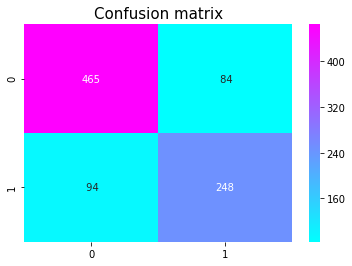

In [391]:
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.metrics import accuracy_score  #for accuracy_score


model = LogisticRegression()
model.fit(X_train,y_train)
prediction_lr=model.predict(X_test)


print('Accuracy',round(accuracy_score(prediction_lr,y_test)*100,2))
result_lr=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score',round(result_lr.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="cool")
plt.title('Confusion matrix', y=1.05, size=15)

Accuracy 80.6
The cross validated score 81.37


Text(0.5, 1.05, 'Confusion matrix')

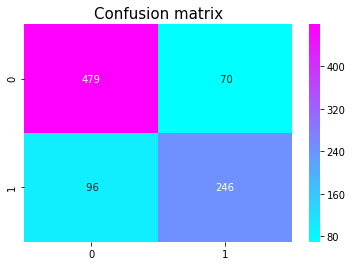

In [392]:
from sklearn.svm import SVC, LinearSVC

model = SVC()
model.fit(X_train,y_train)
prediction_svm=model.predict(X_test)


print('Accuracy',round(accuracy_score(prediction_svm,y_test)*100,2))
result_svm=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score',round(result_svm.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="cool")
plt.title('Confusion matrix', y=1.05, size=15)

Accuracy 77.61
The cross validated score 80.6


Text(0.5, 1.05, 'Confusion matrix')

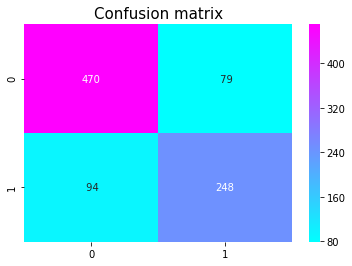

In [393]:
from sklearn.neighbors import KNeighborsClassifier


model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X_train,y_train)
prediction_knn=model.predict(X_test)


print('Accuracy',round(accuracy_score(prediction_knn,y_test)*100,2))
result_knn=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score',round(result_knn.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="cool")
plt.title('Confusion matrix', y=1.05, size=15)

Accuracy 79.85
The cross validated score 77.67


Text(0.5, 1.05, 'Confusion matrix')

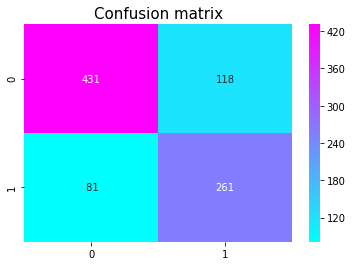

In [394]:
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
model.fit(X_train,y_train)
prediction_gnb=model.predict(X_test)


print('Accuracy',round(accuracy_score(prediction_gnb,y_test)*100,2))
result_gnb=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score',round(result_gnb.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="cool")
plt.title('Confusion matrix', y=1.05, size=15)

Accuracy 76.49
The cross validated score 79.47


Text(0.5, 1.05, 'Confusion matrix')

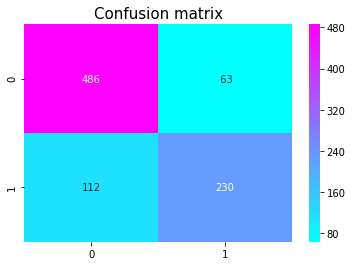

In [395]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(criterion='gini', 
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto')
model.fit(X_train,y_train)
prediction_tree=model.predict(X_test)


print('Accuracy',round(accuracy_score(prediction_tree,y_test)*100,2))
result_tree=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score',round(result_tree.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="cool")
plt.title('Confusion matrix', y=1.05, size=15)

Accuracy 79.1
The cross validated score 80.6


Text(0.5, 1.05, 'Confusion matrix')

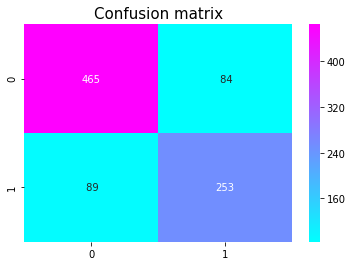

In [396]:
from sklearn.ensemble import AdaBoostClassifier
model= AdaBoostClassifier()
model.fit(X_train,y_train)
prediction_adb=model.predict(X_test)


print('Accuracy',round(accuracy_score(prediction_adb,y_test)*100,2))
result_adb=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score',round(result_adb.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="cool")
plt.title('Confusion matrix', y=1.05, size=15)

Accuracy 80.6
The cross validated score 79.8


Text(0.5, 1.05, 'Confusion matrix')

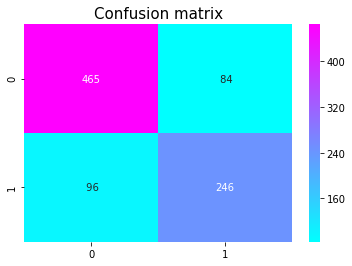

In [397]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model= LinearDiscriminantAnalysis()
model.fit(X_train,y_train)
prediction_lda=model.predict(X_test)


print('Accuracy',round(accuracy_score(prediction_lda,y_test)*100,2))
result_lda=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score',round(result_lda.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="cool")
plt.title('Confusion matrix', y=1.05, size=15)

Accuracy 79.1
The cross validated score 81.71


Text(0.5, 1.05, 'Confusion matrix')

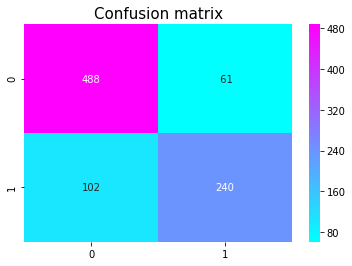

In [398]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier()
model.fit(X_train,y_train)
prediction_gbc=model.predict(X_test)


print('Accuracy',round(accuracy_score(prediction_gbc,y_test)*100,2))
result_gbc=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score',round(result_gbc.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="cool")
plt.title('Confusion matrix', y=1.05, size=15)

Accuracy 79.1
The cross validated score 81.38


Text(0.5, 1.05, 'Confusion matrix')

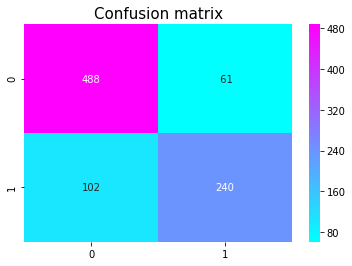

In [399]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)
model_rf.fit(X_train,y_train)
prediction_rm=model.predict(X_test)


print('Accuracy',round(accuracy_score(prediction_rm,y_test)*100,2))
result_rm=cross_val_score(model_rf,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score',round(result_rm.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="cool")
plt.title('Confusion matrix', y=1.05, size=15)

Accuracy 77.24
The cross validated score 81.38


Text(0.5, 1.05, 'Confusion matrix')

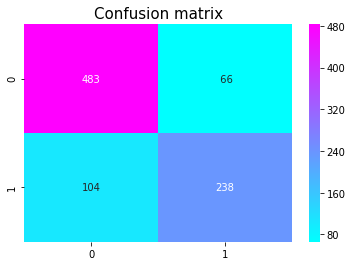

In [400]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
model1.fit(X_train,y_train)

prediction_rm1=model1.predict(X_test)

print('Accuracy',round(accuracy_score(prediction_rm1,y_test)*100,2))
result_rm1=cross_val_score(model1,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score',round(result_rm.mean()*100,2))
y_pred = cross_val_predict(model1,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="cool")
plt.title('Confusion matrix', y=1.05, size=15)

In [401]:
models = pd.DataFrame({
    'Model': ["support vector machine",'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'AdaBoostClassifier', 
              'Gradient Decent', 'Linear Discriminant Analysis', 
              'Decision Tree',"Tuned RF"],
    'Score': [result_svm.mean(),result_knn.mean(), result_lr.mean(), 
              result_rm.mean(), result_gnb.mean(), result_adb.mean(), 
              result_gbc.mean(), result_lda.mean(), result_tree.mean(),result_rm1.mean()]})
models.sort_values(by='Score',ascending=False) #pd.DAtaFrame() is a function that takes a dictionary as an input. Within this list we determine key-values paires (column name-values within column)

,Model,Score
6,Gradient Decent,0.817062
3,Random Forest,0.813792
9,Tuned RF,0.813779
0,support vector machine,0.813716
5,AdaBoostClassifier,0.805976
1,KNN,0.805951
2,Logistic Regression,0.800232
7,Linear Discriminant Analysis,0.797985
8,Decision Tree,0.794689
4,Naive Bayes,0.776687


In [402]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
random_forest.fit(train_X, train_Y)
Y_pred_rf = random_forest.predict(test_X)
random_forest.score(train_X,train_Y)
acc_random_forest = round(random_forest.score(train_X, train_Y) * 100, 2)
print(acc_random_forest)

89.34


Feature selection


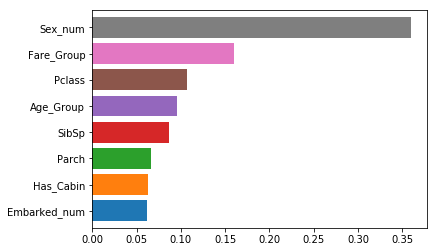

In [403]:
print("Feature selection")
pd.Series(random_forest.feature_importances_,X_train.columns).sort_values(ascending=True).plot.barh(width=0.8) #in a series x (theirs relative importance) and y values are taken

In [405]:
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": Y_pred_rf})

In [406]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [407]:
submission.to_csv('submission.csv', index=False)